# Eye State Recognition Using Alpha Waves

## Loading & Inspecting Dataset   

In [60]:
import dataset
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# define the dataset instance
eeg_dataset = dataset.AlphaWaves() 
eeg_dataset.subject_list 

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [63]:
# get the data from subject 1
subject = eeg_dataset.subject_list[0]
raw = eeg_dataset._get_single_subject_data(subject) 
print(type(raw))
raw.get_data().shape # 16 channels + stimulation label 
# very huge data size, so we need to resample with a less sampling rate  

<class 'mne.io.array.array.RawArray'>


(17, 119808)

(17, 29952)


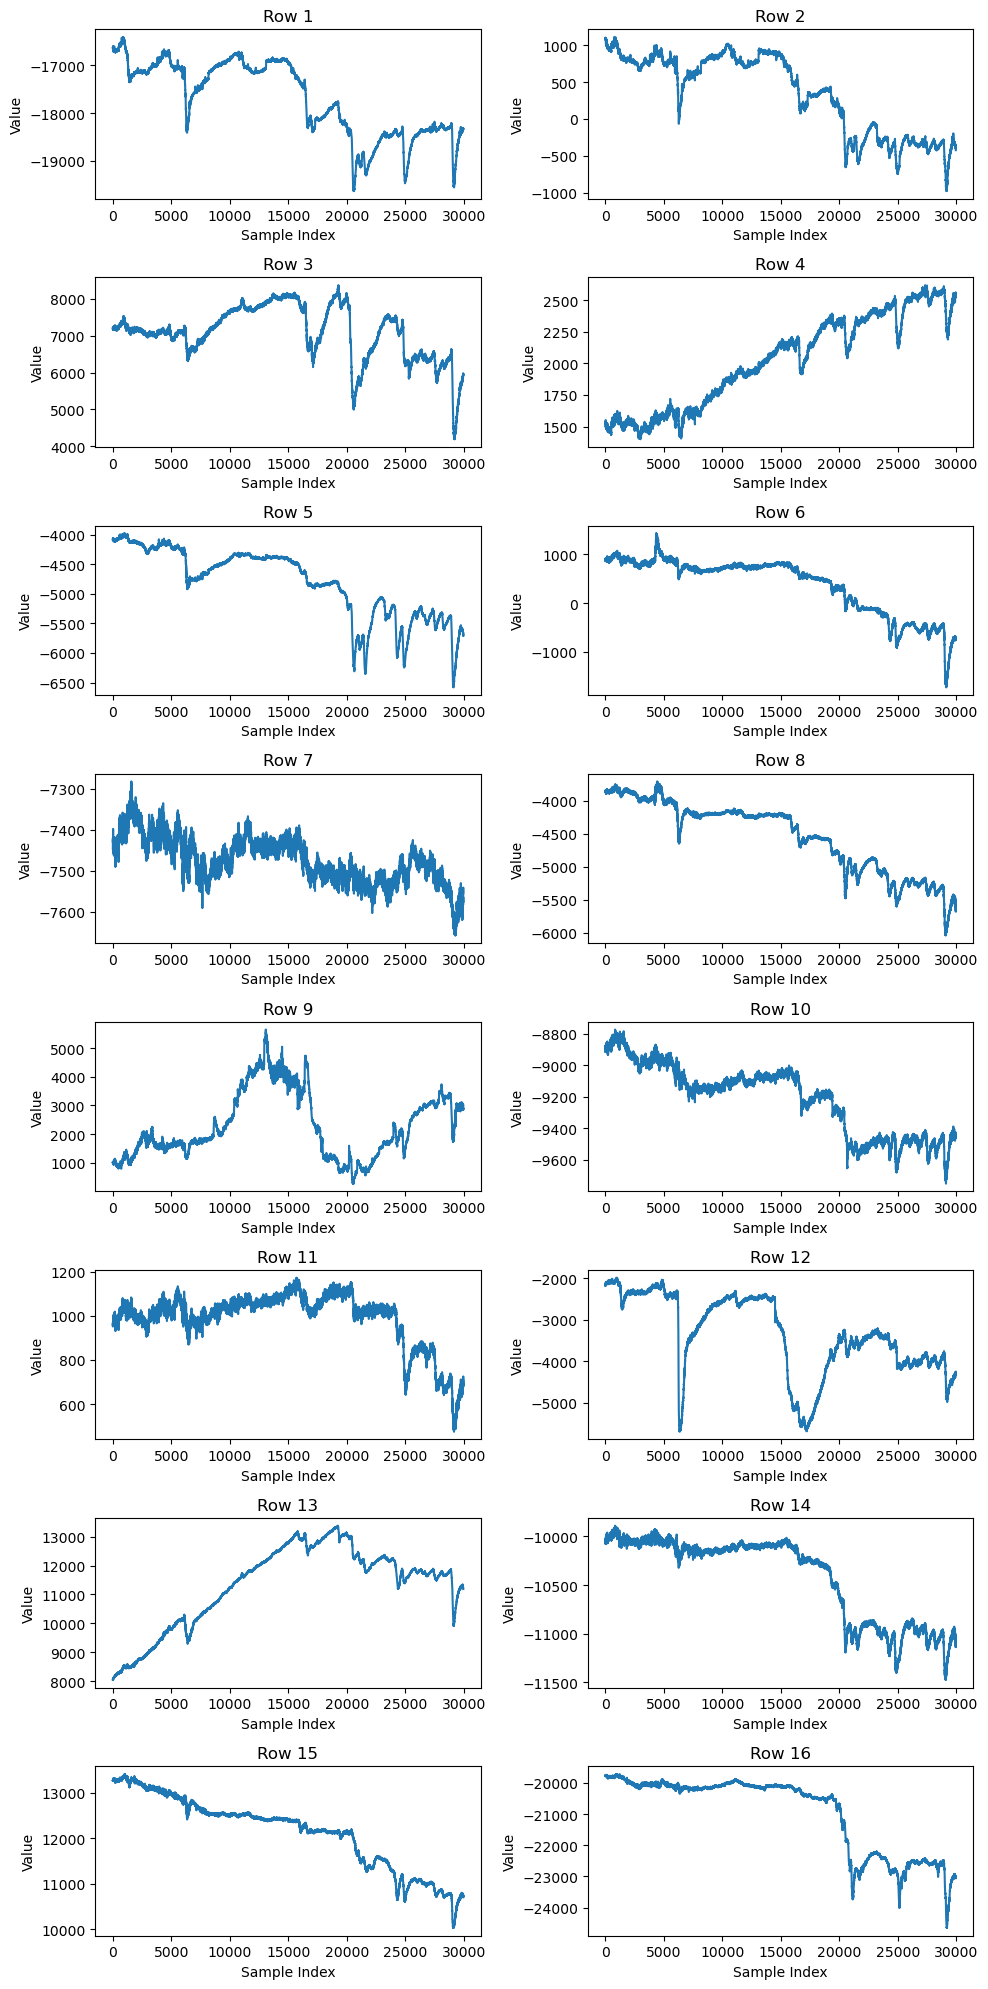

In [65]:
raw.resample(sfreq=128, verbose=False) # the actual sfreq 512 Hz  
print(raw.get_data().shape)  # after resampling 
data = raw.get_data()

num_rows = 8 
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))

for i in range(data.shape[0]-1): # plot the 16 channels 
    row = i // 2 # two per row 
    col = i % 2 # 8 per column 

    axes[row, col].plot(data[i, :])
    axes[row, col].set_title(f'Row {i + 1}')
    axes[row, col].set_xlabel('Sample Index')
    axes[row, col].set_ylabel('Value')
plt.tight_layout()

There are artifacts resulting from noisy sources during the recording process, which need to be removed!!